# IBM DATA SCIENCE - Final Capstone Project - Economic comparison of Hong Kong and Singapore
### by Fabien Nugier

In this notebook, we propose to compare Hong Kong and Singapore - two of the 4 Asian Tigers (with Taiwan and South Korea) - and to draw some description of the two economies.

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [COMPARISON ON ECONOMIC INDICATORS](#1)<br>
1.1 [Getting Economic Data](#11)<br>
1.2 [Getting Yearly Average Currency Exchange Rates](#12)<br>
1.3 [Comparing Economic Indicators](#13)<br>
2. [COMPARISON ON DISTRICT VENUES](#2)<br>
2.1 [Singapore Districts](#21)<br>
2.2 [Hong Kong Cities and Districts](#22)<br>
2.3 [Singapore Venues](#23)<br>
2.4 [Hong Kong Venues](#24)<br>
2.5 [Comparing the Tigers Venues](#25)<br>
</div>
<hr>

# 1 - COMPARISON ON ECONOMIC INDICATORS <a id="1"></a>

Importing libraries for this notebook:

In [1]:
# Scientific computing:
import numpy as np

# data structures:
import pandas as pd

# For plots and visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

# To compute the R^2 and MSE of fits:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# To plot maps:
import folium

# To scrape HTML pages:
from bs4 import BeautifulSoup
import requests

## 1.1 - Getting Economic Data <a id="11"></a>

We import data from the United Nations:

http://data.un.org/Data.aspx?q=GDP+by+Type+of+Expenditure+at+current+prices+&d=SNAAMA&f=grID%3a101%3bcurrID%3aNCU%3bpcFlag%3a0

In [2]:
df_brute = pd.read_csv('./UNdata_Export_20191024_114358730.csv')

In [3]:
print(df_brute.shape)
df_brute.head()

(864, 7)


,Table Code,Country or Area Code,Country or Area,Year,Item Code,Item,Value
0,1,344,"China, Hong Kong SAR",2017,1,Final consumption expenditure,2045648000000
1,1,344,"China, Hong Kong SAR",2017,2,Household consumption expenditure (including N...,1783704000000
2,1,344,"China, Hong Kong SAR",2017,3,General government final consumption expenditure,261944000000
3,1,344,"China, Hong Kong SAR",2017,4,Gross capital formation,595947000000
4,1,344,"China, Hong Kong SAR",2017,5,Gross fixed capital formation (including Acqui...,584567000000


Let us remove the columns 'Table Code' and 'Country or Area Code' and symplify names.

In [4]:
df_brute.drop(columns=['Table Code', 'Country or Area Code'], axis=1, inplace=True)
df_brute.replace(to_replace='China, Hong Kong SAR', value='Hong Kong', inplace=True)
df_brute.head(10)

,Country or Area,Year,Item Code,Item,Value
0,Hong Kong,2017,1,Final consumption expenditure,2045648000000
1,Hong Kong,2017,2,Household consumption expenditure (including N...,1783704000000
2,Hong Kong,2017,3,General government final consumption expenditure,261944000000
3,Hong Kong,2017,4,Gross capital formation,595947000000
4,Hong Kong,2017,5,Gross fixed capital formation (including Acqui...,584567000000
5,Hong Kong,2017,6,Changes in inventories,11380000000
6,Hong Kong,2017,7,Exports of goods and services,5000468000000
7,Hong Kong,2017,8,Imports of goods and services,4979426000000
8,Hong Kong,2017,9,Gross Domestic Product (GDP),2662637000000
9,Hong Kong,2016,1,Final consumption expenditure,1897193000000


Let us create one data frame for Hong Kong and one for Singapore.

In [5]:
list_items = df_brute['Item'].unique().tolist()
list_cols = []
list_cols.append('Year')
for it in list_items:
    list_cols.append(it)
list_cols

['Year',
 'Final consumption expenditure',
 'Household consumption expenditure (including Non-profit institutions serving households)',
 'General government final consumption expenditure',
 'Gross capital formation',
 'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
 'Changes in inventories',
 'Exports of goods and services',
 'Imports of goods and services',
 'Gross Domestic Product (GDP)']

In [6]:
df_HK = pd.DataFrame(columns=list_cols)
df_Singap = pd.DataFrame(columns=list_cols)
df_HK.head()

,Year,Final consumption expenditure,Household consumption expenditure (including Non-profit institutions serving households),General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product (GDP)


Let us fill up their values with the initial data frame.

In [7]:
df_brute.head()

,Country or Area,Year,Item Code,Item,Value
0,Hong Kong,2017,1,Final consumption expenditure,2045648000000
1,Hong Kong,2017,2,Household consumption expenditure (including N...,1783704000000
2,Hong Kong,2017,3,General government final consumption expenditure,261944000000
3,Hong Kong,2017,4,Gross capital formation,595947000000
4,Hong Kong,2017,5,Gross fixed capital formation (including Acqui...,584567000000


In [8]:
for i in range(0,len(df_brute.index),9):
    list_keys = ['Year'] + df_brute.iloc[i:i+9,3].tolist() 
    list_val = [df_brute.iloc[i,1]] + df_brute.iloc[i:i+9,4].tolist()
    dic = dict(zip(list_keys,list_val))
    
    if df_brute.iloc[i,0] == 'Hong Kong':
        df_HK = df_HK.append(dic, ignore_index=True)
    elif df_brute.iloc[i,0] == 'Singapore':
        df_Singap = df_Singap.append(dic, ignore_index=True)
    else:
        print("Error")

In [9]:
print(df_HK.shape)
print(df_Singap.shape)

(48, 10)
(48, 10)


In [10]:
df_HK.info()
df_HK.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
Year                                                                                        48 non-null object
Final consumption expenditure                                                               48 non-null object
Household consumption expenditure (including Non-profit institutions serving households)    48 non-null object
General government final consumption expenditure                                            48 non-null object
Gross capital formation                                                                     48 non-null object
Gross fixed capital formation (including Acquisitions less disposals of valuables)          48 non-null object
Changes in inventories                                                                      48 non-null object
Exports of goods and services                                                               48 non-null object
Imports o

Year                                                                                        0
Final consumption expenditure                                                               0
Household consumption expenditure (including Non-profit institutions serving households)    0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less disposals of valuables)          0
Changes in inventories                                                                      0
Exports of goods and services                                                               0
Imports of goods and services                                                               0
Gross Domestic Product (GDP)                                                                0
dtype: int64

In [11]:
df_Singap.info()
df_Singap.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
Year                                                                                        48 non-null object
Final consumption expenditure                                                               48 non-null object
Household consumption expenditure (including Non-profit institutions serving households)    48 non-null object
General government final consumption expenditure                                            48 non-null object
Gross capital formation                                                                     48 non-null object
Gross fixed capital formation (including Acquisitions less disposals of valuables)          48 non-null object
Changes in inventories                                                                      48 non-null object
Exports of goods and services                                                               48 non-null object
Imports o

Year                                                                                        0
Final consumption expenditure                                                               0
Household consumption expenditure (including Non-profit institutions serving households)    0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less disposals of valuables)          0
Changes in inventories                                                                      0
Exports of goods and services                                                               0
Imports of goods and services                                                               0
Gross Domestic Product (GDP)                                                                0
dtype: int64

Let's convert the types of data.

In [12]:
df_HK = df_HK.astype('int64')
df_Sinpag = df_Singap.astype('int64')

And simplify the titles a bit:

In [13]:
df_HK.rename(columns={'Household consumption expenditure (including Non-profit institutions serving households)':'Household consumption expenditure', 'Gross fixed capital formation (including Acquisitions less disposals of valuables':'Gross fixed capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)':'Gross fixed capital formation', 'Gross Domestic Product (GDP)':'Gross Domestic Product'}, inplace=True)
df_Singap.rename(columns={'Household consumption expenditure (including Non-profit institutions serving households)':'Household consumption expenditure', 'Gross fixed capital formation (including Acquisitions less disposals of valuables':'Gross fixed capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)':'Gross fixed capital formation', 'Gross Domestic Product (GDP)':'Gross Domestic Product'}, inplace=True)

In [14]:
df_HK.head()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
0,2017,2045648000000,1783704000000,261944000000,595947000000,584567000000,11380000000,5000468000000,4979426000000,2662637000000
1,2016,1897193000000,1649585000000,247608000000,536470000000,536023000000,447000000,4657725000000,4600685000000,2490703000000
2,2015,1824354000000,1593091000000,231263000000,516625000000,537205000000,-20580000000,4698173000000,4640872000000,2398280000000
3,2014,1716984000000,1502768000000,214216000000,538389000000,530916000000,7473000000,4815854000000,4811222000000,2260005000000
4,2013,1611630000000,1413058000000,198572000000,513843000000,515516000000,-1673000000,4738699000000,4725867000000,2138305000000


In [15]:
df_Singap.head()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
0,2017,204123543479,155037836607,49122661149,111129034048,99619255650,11509778398,760821953288,658225254434,447283500000
1,2016,196099200000,149824700000,46274500000,103974500000,102014500000,1960000000,706277300000,600108700000,427938800000
2,2015,193658200000,150263600000,43394600000,109246700000,106396100000,2850600000,726136000000,620354700000,418073600000
3,2014,182456600000,143450600000,39006000000,111818600000,104382600000,7436000000,755251600000,659341400000,394751700000
4,2013,176781200000,138775400000,38005800000,115396300000,104910200000,10486100000,734970800000,650321900000,380963700000


Note:** after returning to the UN dataset page I have realized that the Item could have been used as pivot and it was possible to directly obtain the 'Item' as columns. I have decided to keep the document as it is because this leads to the same resulting tables and the part above is also a good illustration of the data manipulation we can have to do sometimes (even if here it wasn't necessary).

## 1.2 Getting yearly average currency exchange rates

Since the data in the previous data frames are in local currencies, we have to bring them into a common currency. The currency we use does not matter as there should not be any arbitrage issues for a year average.

We use data given by Investing.com which can provide monthly averaged currency exchange rates after signing in and downloading the data under csv form.

Let us load the csv file for the pair HKD/USD into a data frame.

In [16]:
df_HKDUSD = pd.read_csv('./USD_HKD_Data.csv')
df_HKDUSD.tail()

,Date,Price,Open,High,Low,Change %
486,Jun 77,4.6795,4.6795,4.6795,4.6795,-0.27%
487,May 77,4.6920,4.6920,4.6920,4.6920,0.86%
488,Apr 77,4.6520,4.6520,4.6520,4.6520,0.33%
489,Mar 77,4.6365,4.6365,4.6365,4.6365,-0.20%
490,Feb 77,4.6460,4.6460,4.6460,4.6460,-0.48%


In [17]:
df_HKDUSD = df_HKDUSD[['Date','Price']]
df_HKDUSD.head(15)

,Date,Price
0,Dec 17,7.8129
1,Nov 17,7.8098
2,Oct 17,7.8011
3,Sep 17,7.8113
4,Aug 17,7.8259
5,Jul 17,7.8102
6,Jun 17,7.8069
7,May 17,7.7920
8,Apr 17,7.7784
9,Mar 17,7.7710


In [18]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][::-1]
list_keys = ['Year'] + months
price_HKDUSD = pd.DataFrame(columns=list_keys)

group_size = 12
for i in range(0,len(df_HKDUSD.index),group_size):
    list_val = [df_HKDUSD.iloc[i,0][-2:]] + df_HKDUSD.iloc[i:i+group_size,1].tolist()
    dic = dict(zip(list_keys,list_val))
    price_HKDUSD = price_HKDUSD.append(dic, ignore_index=True)
price_HKDUSD.head()

,Year,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan
0,17,7.8129,7.8098,7.8011,7.8113,7.8259,7.8102,7.8069,7.7920,7.7784,7.7710,7.7623,7.7589
1,16,7.7545,7.7565,7.7553,7.7562,7.7572,7.7577,7.7591,7.7714,7.7571,7.7572,7.7773,7.7804
2,15,7.7503,7.7530,7.7507,7.7501,7.7500,7.7529,7.7515,7.7530,7.7506,7.7524,7.7558,7.7523
3,14,7.7539,7.7549,7.7550,7.7652,7.7502,7.7501,7.7504,7.7529,7.7527,7.7568,7.7603,7.7637
4,13,7.7539,7.7527,7.7530,7.7560,7.7550,7.7558,7.7565,7.7626,7.7602,7.7635,7.7552,7.7552


In [19]:
def years(x):
    first_char = x[0]
    if first_char == '1':
        x = '201' + x[1]
        return x
    elif first_char == '0':
        x = '200' + x[1]
        return x
    elif first_char == '9':
        x = '199' + x[1]
        return x
    elif first_char == '8':
        x = '198' + x[1]
        return x
    elif first_char == '7':
        x = '197' + x[1]
        return x

price_HKDUSD['Year'] = price_HKDUSD['Year'].apply(years)
price_HKDUSD.head()

,Year,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan
0,2017,7.8129,7.8098,7.8011,7.8113,7.8259,7.8102,7.8069,7.7920,7.7784,7.7710,7.7623,7.7589
1,2016,7.7545,7.7565,7.7553,7.7562,7.7572,7.7577,7.7591,7.7714,7.7571,7.7572,7.7773,7.7804
2,2015,7.7503,7.7530,7.7507,7.7501,7.7500,7.7529,7.7515,7.7530,7.7506,7.7524,7.7558,7.7523
3,2014,7.7539,7.7549,7.7550,7.7652,7.7502,7.7501,7.7504,7.7529,7.7527,7.7568,7.7603,7.7637
4,2013,7.7539,7.7527,7.7530,7.7560,7.7550,7.7558,7.7565,7.7626,7.7602,7.7635,7.7552,7.7552


In [20]:
price_HKDUSD['AVG'] = price_HKDUSD[months].mean(axis=1)
price_HKDUSD.head()

,Year,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan,AVG
0,2017,7.8129,7.8098,7.8011,7.8113,7.8259,7.8102,7.8069,7.7920,7.7784,7.7710,7.7623,7.7589,7.795058
1,2016,7.7545,7.7565,7.7553,7.7562,7.7572,7.7577,7.7591,7.7714,7.7571,7.7572,7.7773,7.7804,7.761658
2,2015,7.7503,7.7530,7.7507,7.7501,7.7500,7.7529,7.7515,7.7530,7.7506,7.7524,7.7558,7.7523,7.751883
3,2014,7.7539,7.7549,7.7550,7.7652,7.7502,7.7501,7.7504,7.7529,7.7527,7.7568,7.7603,7.7637,7.755508
4,2013,7.7539,7.7527,7.7530,7.7560,7.7550,7.7558,7.7565,7.7626,7.7602,7.7635,7.7552,7.7552,7.756633


In [21]:
price_HKDUSD = price_HKDUSD[['Year', 'AVG']]
price_HKDUSD.tail()

,Year,AVG
36,1981,5.612583
37,1980,4.981583
38,1979,4.995167
39,1978,4.684350
40,1977,4.659927


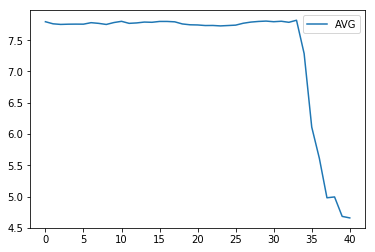

In [22]:
price_HKDUSD.plot()

Notice here that the x-axis represent the rows, and thus goes towards the past. In 1972, the HKD was "pegged" to the USD at a rate HKD7.8 = USD1, which explains why the value does not evolve much in the years after.

We just have to do exactly the same for USD/SGD.

In [23]:
df_SGDUSD = pd.read_csv('./USD_SGD_Data.csv')
df_SGDUSD.tail()

df_SGDUSD = df_SGDUSD[['Date','Price']]
df_SGDUSD.head(15)

price_SGDUSD = pd.DataFrame(columns=list_keys)

for i in range(0,len(df_SGDUSD.index),group_size):
    list_val = [df_SGDUSD.iloc[i,0][-2:]] + df_SGDUSD.iloc[i:i+group_size,1].tolist()
    dic = dict(zip(list_keys,list_val))
    price_SGDUSD = price_SGDUSD.append(dic, ignore_index=True)

price_SGDUSD['Year'] = price_SGDUSD['Year'].apply(years)
price_SGDUSD['AVG'] = price_SGDUSD[months].mean(axis=1)
price_SGDUSD = price_SGDUSD[['Year', 'AVG']]
price_SGDUSD.tail()

,Year,AVG
32,1985,2.188917
33,1984,2.137625
34,1983,2.114375
35,1982,2.141667
36,1981,2.111000


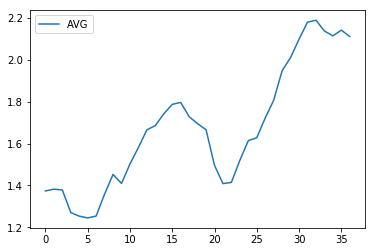

In [24]:
price_SGDUSD.plot()

We can now correct the previous data frames containing economic indicators to put them both in USD.

In [25]:
df_HK.tail()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
43,1974,33552000000,30800000000,2752000000,11424000000,10746000000,678000000,40926000000,38662000000,47240000000
44,1973,29261000000,27116000000,2145000000,9457000000,9154000000,303000000,35302000000,32693000000,41327000000
45,1972,22110000000,20404000000,1706000000,7544000000,7308000000,236000000,27184000000,24625000000,32213000000
46,1971,19065000000,17663000000,1402000000,6495000000,6298000000,197000000,23841000000,22720000000,26681000000
47,1970,16611000000,15304000000,1307000000,4715000000,4544000000,171000000,21532000000,19752000000,23106000000


In [26]:
df_HK = df_HK.drop(range(41,48,1))
df_HK.tail()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
36,1981,115566000000,103722000000,11844000000,60647000000,56694000000,3953000000,157146000000,159781000000,173578000000
37,1980,94305000000,86233000000,8072000000,50056000000,46311000000,3745000000,127455000000,128197000000,143619000000
38,1979,74457000000,68251000000,6206000000,36777000000,33521000000,3256000000,101007000000,99550000000,112691000000
39,1978,60267000000,55378000000,4889000000,24645000000,22578000000,2067000000,73416000000,72546000000,85782000000
40,1977,49060000000,44971000000,4089000000,19436000000,17734000000,1702000000,61091000000,56303000000,73284000000


In [27]:
df_HK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 10 columns):
Year                                                41 non-null int64
Final consumption expenditure                       41 non-null int64
Household consumption expenditure                   41 non-null int64
General government final consumption expenditure    41 non-null int64
Gross capital formation                             41 non-null int64
Gross fixed capital formation                       41 non-null int64
Changes in inventories                              41 non-null int64
Exports of goods and services                       41 non-null int64
Imports of goods and services                       41 non-null int64
Gross Domestic Product                              41 non-null int64
dtypes: int64(10)
memory usage: 3.5 KB


In [28]:
price_HKDUSD['Year'].astype('int64')
price_HKDUSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
Year    41 non-null object
AVG     41 non-null float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


In [29]:
print(df_HK.update(df_HK.iloc[:,1:10].div(price_HKDUSD.AVG, 0)))
df_HK.head()

None


,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
0,2017,2.624288e+11,2.288250e+11,3.360385e+10,7.645190e+10,7.499200e+10,1.459899e+09,6.414921e+11,6.387927e+11,3.415801e+11
1,2016,2.444314e+11,2.125300e+11,3.190143e+10,6.911796e+10,6.906037e+10,5.759079e+07,6.000941e+11,5.927451e+11,3.208983e+11
2,2015,2.353433e+11,2.055102e+11,2.983314e+10,6.664509e+10,6.929993e+10,-2.654839e+09,6.060686e+11,5.986767e+11,3.093803e+11
3,2014,2.213890e+11,1.937678e+11,2.762114e+10,6.942021e+10,6.845663e+10,9.635732e+08,6.209592e+11,6.203619e+11,2.914064e+11
4,2013,2.077744e+11,1.821741e+11,2.560028e+10,6.624562e+10,6.646131e+10,-2.156864e+08,6.109221e+11,6.092678e+11,2.756744e+11


In [30]:
df_Singap.tail()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
43,1974,9069700000,7759500000,1310200000,5709800000,4812600000,897200000,19179300000,21106800000,12819700000
44,1973,7524100000,6399500000,1124600000,4045200000,3606300000,438900000,12301800000,13243200000,10388700000
45,1972,6106100000,5111200000,994900000,3392700000,3092600000,300100000,8861800000,10154900000,8297600000
46,1971,5429000000,4564300000,864700000,2778100000,2507400000,270700000,8278700000,9690300000,6926100000
47,1970,4643400000,3947600000,695800000,2244500000,1888500000,356000000,7409500000,8526900000,5876000000


In [31]:
df_Singap = df_Singap.drop(range(37,48,1))
price_SGDUSD['Year'].astype('int64')
print(df_Singap.update(df_Singap.iloc[:,1:10].div(price_SGDUSD.AVG, 0)))
df_Singap.tail()

None


,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
32,1985,1.087e+10,8.36935e+09,2.50069e+09,7.67151e+09,7.61377e+09,5.77455e+07,2.84169e+10,2.8361e+10,1.86503e+10
33,1984,1.0571e+10,8.4992e+09,2.07179e+09,9.16012e+09,9.02207e+09,1.3805e+08,3.05447e+10,3.05828e+10,1.95086e+10
34,1983,9.79736e+09,7.86904e+09,1.92832e+09,8.36006e+09,8.29782e+09,6.22406e+07,3.00352e+10,2.99301e+10,1.79907e+10
35,1982,8.95928e+09,7.25813e+09,1.70115e+09,7.34073e+09,7.26925e+09,7.14864e+07,2.94093e+10,2.97e+10,1.58614e+10
36,1981,8.24041e+09,6.89043e+09,1.34998e+09,6.43823e+09,6.05817e+09,3.80057e+08,2.84947e+10,2.89855e+10,1.43746e+10


## 1.3 - Comparing Economic Indicators <a id="13"></a>

### Plotting the GDP

In [32]:
df_HK.head().columns.tolist()

['Year',
 'Final consumption expenditure',
 'Household consumption expenditure',
 'General government final consumption expenditure',
 'Gross capital formation',
 'Gross fixed capital formation',
 'Changes in inventories',
 'Exports of goods and services',
 'Imports of goods and services',
 'Gross Domestic Product']

In [33]:
#df_GDP = pd.concat([df_HK['Gross Domestic Product (GDP)'],df_Singap['Gross Domestic Product (GDP)']], axis=1, keys=['Year','GDP Hong Kong', 'GDP Singapore'])
#df_GDP.head()
left_frame = df_HK[['Year','Gross Domestic Product']].astype('str')
left_frame.rename(columns={'Gross Domestic Product':'GDP'}, inplace=True)
right_frame = df_Singap[['Year','Gross Domestic Product']].astype('str')
right_frame.rename(columns={'Gross Domestic Product':'GDP'}, inplace=True)

df_GDP = pd.merge(left_frame, right_frame, how='left', on=['Year'], suffixes=(' Hong Kong (USD)', ' Singapore (USD)'))

df_GDP = df_GDP.astype('float64')
df_GDP.set_index('Year', inplace=True)
df_GDP.tail(10)

,GDP Hong Kong (USD),GDP Singapore (USD)
Year,,
1986.0,4.108000e+10,1.874265e+10
1985.0,3.572346e+10,1.865028e+10
1984.0,3.350888e+10,1.950857e+10
1983.0,2.982154e+10,1.799071e+10
1982.0,3.207260e+10,1.586139e+10
1981.0,3.092658e+10,1.437456e+10
1980.0,2.882999e+10,NaN
1979.0,2.256001e+10,NaN
1978.0,1.831247e+10,NaN


Let us suppress these last 4 rows so that they do not bring troubles when we do some fits.

In [34]:
#print(df_GDP['GDP Singapore (USD)'].isnull().tolist())
#print(df_GDP['GDP Singapore (USD)'].notnull().count())

df_GDP.dropna(subset=['GDP Singapore (USD)'], axis=0, inplace=True)
df_GDP.tail()

,GDP Hong Kong (USD),GDP Singapore (USD)
Year,,
1985.0,3.572346e+10,1.865028e+10
1984.0,3.350888e+10,1.950857e+10
1983.0,2.982154e+10,1.799071e+10
1982.0,3.207260e+10,1.586139e+10
1981.0,3.092658e+10,1.437456e+10


Since we have GDP's in local money, we cannot compare the values at this point. We need a conversion to a third money.

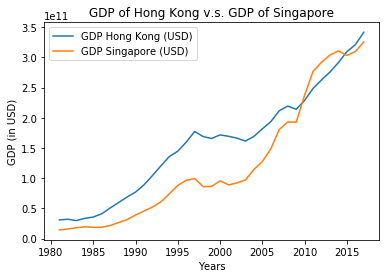

In [35]:
df_GDP.index = df_GDP.index.map(int)
df_GDP.plot(kind='line')
plt.title('GDP of Hong Kong v.s. GDP of Singapore')
plt.ylabel('GDP (in USD)')
plt.xlabel('Years')

plt.savefig('./GDP_HK_Singap_inUSD.png', dpi=300)
plt.show()

We can see that the GDP of Hong Kong and Singapore are quite comparable, with Singapore catching up around 2010. 

### Fitting the GDP

In [36]:
df_GDP.reset_index(inplace=True)
df_GDP.head()

,Year,GDP Hong Kong (USD),GDP Singapore (USD)
0,2017,3.415801e+11,3.256069e+11
1,2016,3.208983e+11,3.095995e+11
2,2015,3.093803e+11,3.032705e+11
3,2014,2.914064e+11,3.107282e+11
4,2013,2.756744e+11,3.039382e+11


In [37]:
x = df_GDP['Year']
y = df_GDP['GDP Hong Kong (USD)']
fit = np.polyfit(x,y,deg=2)
fit

array([ 4.92763511e+07, -1.88883255e+11,  1.80822090e+14])

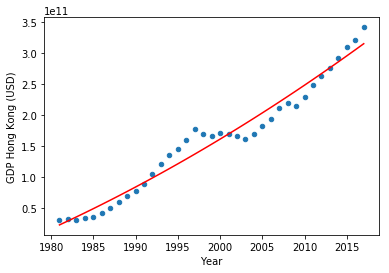

In [38]:
df_GDP.plot(kind='scatter', x='Year', y='GDP Hong Kong (USD)')
plt.plot(x, fit[0]*x*x + fit[1]*x + fit[2], color='red')
plt.show()

We use regplot from seaborn to show explicitly that there is a correlation between the two economies GDPs.

(0, 385560297536.63)


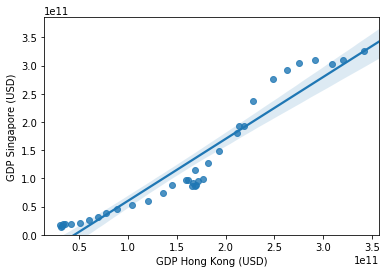

In [39]:
sns.regplot(x='GDP Hong Kong (USD)', y='GDP Singapore (USD)', data=df_GDP)
print(plt.ylim(0,))

Text(0.5, 1.0, 'Residue Plot')

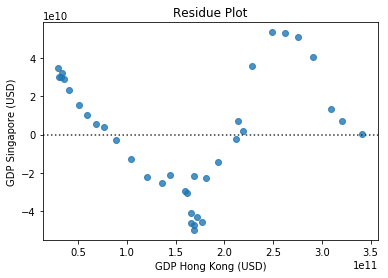

In [40]:
sns.residplot(df_GDP['GDP Hong Kong (USD)'],df_GDP['GDP Singapore (USD)']).set_title("Residue Plot")

This clearly shows that there is a non-linear relationship between the 2 GDPs.

In [41]:
x = df_GDP['GDP Hong Kong (USD)']
y = df_GDP['GDP Singapore (USD)']
f = np.polyfit(x,y,deg=4)
pol = np.poly1d(f)
print(pol)

           4             3            2
-2.27e-34 x + 1.364e-22 x - 2.24e-11 x + 1.728 x - 1.988e+10


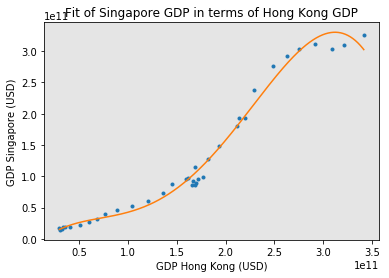

In [42]:
x_new = np.linspace(df_GDP['GDP Hong Kong (USD)'].min(), df_GDP['GDP Hong Kong (USD)'].max(), 1000)
y_new = pol(x_new)

plt.plot(x, y, '.', x_new, y_new, '-')
plt.title('Fit of Singapore GDP in terms of Hong Kong GDP')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('GDP Hong Kong (USD)')
plt.ylabel('GDP Singapore (USD)')

plt.show()
plt.close()

Text(0.5, 1.0, "Residue between 'GDP Hong Kong (USD)' - pol().")

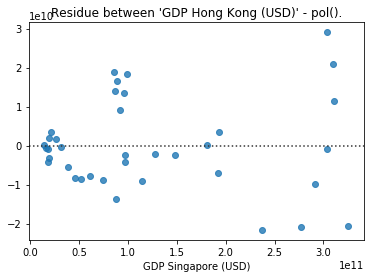

In [43]:
sns.residplot(y,pol(x)).set_title("Residue between 'GDP Hong Kong (USD)' - pol().")

In [44]:
print('The R-square value is: ', r2_score(y, pol(x)))

The R-square value is:  0.9868190864488355


In [45]:
print('The Means Square Error value is: ', mean_squared_error(x, pol(x)))

The Means Square Error value is:  2.0284221318683403e+21


**Important notice:** even though it is interesting visualy, the relation GDP_Singa = func(GDP_HK) does not have much interest in practice. Indeed, this relation show a positive correlation simply because both GDPs grow simultaneously. This happens for reasons which are not revealed here and which are probably similar in both economies, but one cannot say that one GDP directly depends on another (there is correlation without causation), hence this relation would not be very useful in practice to estimate one GDP from the other at a certain time in the past.

### Plotting the Expenditures

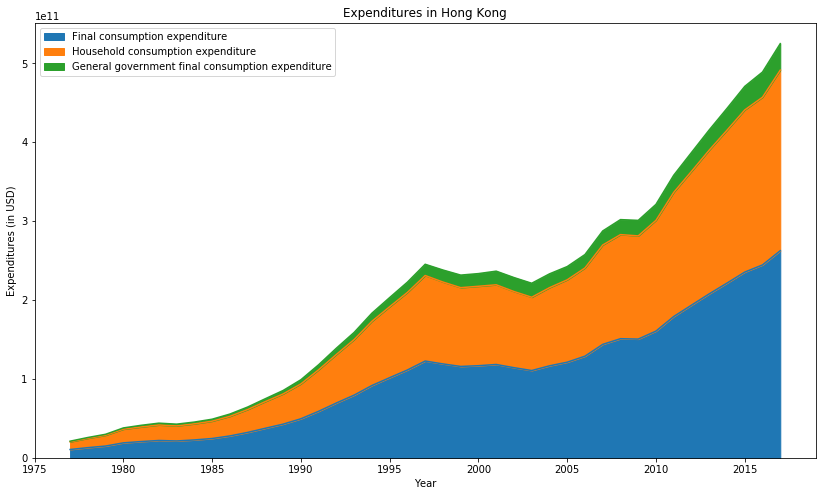

In [46]:
df_HK_sorted = df_HK.sort_values(by='Year', axis=0, ascending=True)
df_HK_sorted.head()
df_HK_expend = df_HK_sorted[['Year','Final consumption expenditure','Household consumption expenditure','General government final consumption expenditure']]
df_HK_expend.set_index('Year', inplace=True)

df_HK_expend.plot(kind='area', figsize=(14,8))
plt.title('Expenditures in Hong Kong')
plt.ylabel('Expenditures (in USD)')
plt.xlabel('Year')
plt.show()

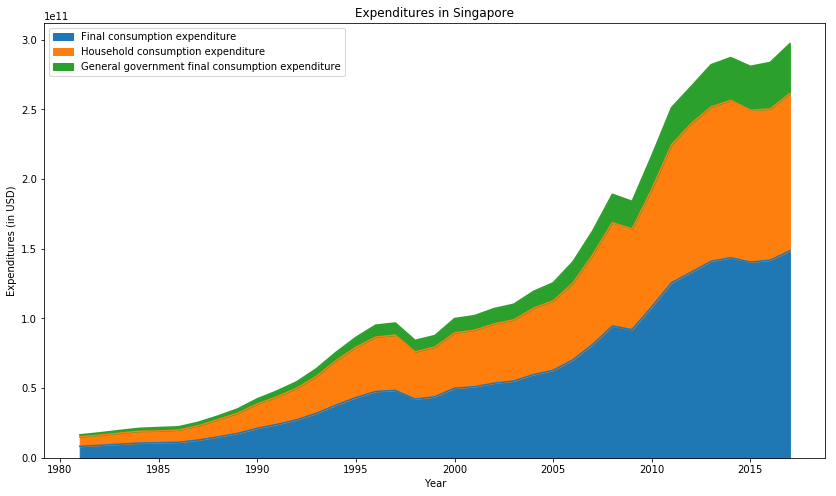

In [47]:
df_Singap_sorted = df_Singap.sort_values(by='Year', axis=0, ascending=True)
df_Singap_sorted.head()
df_Singap_expend = df_Singap_sorted[['Year','Final consumption expenditure','Household consumption expenditure','General government final consumption expenditure']]
df_Singap_expend.set_index('Year', inplace=True)

df_Singap_expend.plot(kind='area', figsize=(14,8))
plt.title('Expenditures in Singapore')
plt.ylabel('Expenditures (in USD)')
plt.xlabel('Year')
plt.show()

# 2 - COMPARISON ON DISTRICT VENUES <a id="2"></a>

## 2.1 - Singapore Districts <a id="21"></a>

I have build a csv file by taking the names of areas in districts 1 to 28 from https://www.iproperty.com.sg/resources/District_Guide.aspx# and used https://latitude.to/ to get their geolocalisation. A map of the districts can also be found on http://www.propertyhub.com.sg/singapore-district-guide.html .

In [48]:
Dist_Singap = pd.read_csv('./Singap_Districts.csv')
Dist_Singap.head()

,District,Name,Latitude,Longitude
0,1,Raffles Place,1.28410,103.85133
1,1,Marina,1.28069,103.85430
2,1,Cecil,1.27948,103.84826
3,2,Tanjong Pagar,1.27803,103.84045
4,2,Chinatown,1.28149,103.84482


In [49]:
latitude_Singap = 1.290270
longitude_Singap = 103.851959

# creating the map
map_Singap = folium.Map(location=[latitude_Singap, longitude_Singap], zoom_start=11)

# adding markers
for lat, lng, district, name in zip(Dist_Singap['Latitude'], Dist_Singap['Longitude'], Dist_Singap['District'], Dist_Singap['Name']):
    label = 'District {} - Place: {}'.format(district, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Singap)

In [50]:
map_Singap

Let us aggregate columns and have one row per district. We concatenante the names together and take the mean of Latitude and Longitude within a district.

About the functions that can be used in .agg():
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [51]:
Dist_Singap_concat = Dist_Singap.groupby('District').agg({'Name': lambda x: ', '.join(set(x.dropna())), 'Latitude':'mean', 'Longitude':'mean'})
Dist_Singap_concat.reset_index(inplace=True)
Dist_Singap_concat

,District,Name,Latitude,Longitude
0,1,"Raffles Place, Cecil, Marina",1.281423,103.851297
1,2,"Tanjong Pagar, Chinatown",1.279760,103.842635
2,3,"Alexandra, Tiong Bahru, Queenstown",1.289133,103.805507
3,4,"Mount Faber, Telok Blangah, Harbourfront",1.268620,103.819307
4,5,"Buona Vista, Clementi, Pasir Panjang",1.297257,103.778533
5,6,"Clarke Quay, City Hall",1.291650,103.848490
6,7,"Beach Road, Golden Mile, Bugis",0.884833,69.240170
7,8,"Little India, Farrer Park",1.309225,103.851635
8,9,"Orchard Road, River Valley",1.298805,103.837070
9,10,"Bukit Timah, Holland, Balmoral",1.319277,103.811170


In [52]:
# Re-creating the map
# Comment this line to check that average (red) points are the average of previous (blue) points
map_Singap = folium.Map(location=[latitude_Singap, longitude_Singap], zoom_start=11) 

# adding the new markers to the map for comparision
for lat, lng, district, name in zip(Dist_Singap_concat['Latitude'], Dist_Singap_concat['Longitude'], Dist_Singap_concat['District'], Dist_Singap_concat['Name']):
    label = 'District {} - Places: {}'.format(district, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Singap)

map_Singap

We can see that these red points correspond quite well to the centers of the districts as shown in the following map:
    
<img src="http://www.propertyhub.com.sg/images/M_images/singapore_district_map.jpg" alt="Simply Easy Learning" width="800" height="600">

## 2.2 - Hong Kong Cities and Districts <a id="22"></a>

### Cities of Hong Kong

To get the data of Hong Kong cities names and locations, we will scrape the following HTML page where data is already available:
https://www.geodatos.net/en/coordinates/hong-kong

In [53]:
source = requests.get('https://www.geodatos.net/en/coordinates/hong-kong').text
soup = BeautifulSoup(source, 'lxml') # We use the lxml parser

In [54]:
table_on_page = soup.findAll('table', class_='table table-responsive table-striped table-hover')[1] # Select second table
print(table_on_page.prettify())

<table class="table table-responsive table-striped table-hover">
 <thead>
  <tr>
   <th>
    City
   </th>
   <th>
    Coordinates
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    Hong Kong
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/central-and-western/hong-kong">
     22.2783203, 114.1746902
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Kowloon
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/kowloon-city/kowloon">
     22.3166695, 114.1833267
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Tsuen Wan
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/tsuen-wan">
     22.3706608, 114.1047897
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Yuen Long Kau Hui
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/yuen-long/yuen-long-kau-hui">
     22.4500008, 114.0333328
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Tung Chung
   </td>
   <td>
    <a href="https://www.ge

In [55]:
values_td = []
for val in table_on_page.find_all('td'):
    values_td.append(val.text)
values_td

['Hong Kong',
 '22.2783203, 114.1746902',
 'Kowloon',
 '22.3166695, 114.1833267',
 'Tsuen Wan',
 '22.3706608, 114.1047897',
 'Yuen Long Kau Hui',
 '22.4500008, 114.0333328',
 'Tung Chung',
 '22.2878304, 113.9424286',
 'Sha Tin',
 '22.3833294, 114.1833267',
 'Tuen Mun',
 '22.3917503, 113.9715729',
 'Tai Po',
 '22.4500694, 114.1687698',
 'Sai Kung',
 '22.3833294, 114.2666702',
 'Yung Shue Wan',
 '22.2262306, 114.1124115',
 'Ngong Ping',
 '22.2555599, 113.9039078',
 'Sok Kwu Wan',
 '22.2045307, 114.1315918',
 'Tai O',
 '22.2551498, 113.8630905',
 'Wong Tai Sin',
 '22.3500004, 114.1833267',
 'Wan Chai',
 '22.2814198, 114.1725769',
 'Sham Shui Po',
 '22.3302307, 114.1594467',
 'Central',
 '22.2829895, 114.1584625']

In [56]:
Cities_HK = pd.DataFrame(columns=['City Name','Latitude','Longitude'])
Cities_HK.head()

,City Name,Latitude,Longitude


In [57]:
for i in range(0,len(values_td)-1,2):
    tmp = values_td[i+1].split(sep=', ')
    #print(values_td[i], tmp[0], tmp[1])
    Cities_HK = Cities_HK.append({'City Name':values_td[i],'Latitude':tmp[0],'Longitude':tmp[1]}, ignore_index=True)

Cities_HK

,City Name,Latitude,Longitude
0,Hong Kong,22.2783203,114.1746902
1,Kowloon,22.3166695,114.1833267
2,Tsuen Wan,22.3706608,114.1047897
3,Yuen Long Kau Hui,22.4500008,114.0333328
4,Tung Chung,22.2878304,113.9424286
5,Sha Tin,22.3833294,114.1833267
6,Tuen Mun,22.3917503,113.9715729
7,Tai Po,22.4500694,114.1687698
8,Sai Kung,22.3833294,114.2666702
9,Yung Shue Wan,22.2262306,114.1124115


In [58]:
latitude_HK = 22.3964272
longitude_HK = 114.1094971

# creating the map
map_HK = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# adding markers
for lat, lng, district in zip(Cities_HK['Latitude'], Cities_HK['Longitude'], Cities_HK['City Name']):
    label = 'District: {}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK)

In [59]:
map_HK

### Districts of Hong Kong

In [60]:
Dist_HK = pd.read_csv('./HK_Districts.csv')
Dist_HK.head()

,District Name,Latitude,Longitude
0,Central and Western,22.27302,114.14988
1,Eastern,22.27339,114.23608
2,Southern,22.24322,114.19744
3,Wan Chai,22.27602,114.17515
4,Sham Shui Po,22.32859,114.16028


In [61]:
latitude_HK = 22.3964272
longitude_HK = 114.1094971

# re-creating the map
# map_HK = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# adding markers
for lat, lng, district in zip(Dist_HK['Latitude'], Dist_HK['Longitude'], Dist_HK['District Name']):
    label = 'District: {}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK)

In [62]:
map_HK

From Wikipedia, we can see the correspondence between these red points and the center if districts:
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Density_of_Hong_Kong_by_Districts.svg/1280px-Density_of_Hong_Kong_by_Districts.svg.png" alt="Simply Easy Learning" width="800" height="600">

## 2.3 - Singapore Venues <a id="23"></a>

## 2.4 - Hong Kong Venues <a id="24"></a>

## 2.5 - Comparing the Tigers Venues <a id="25"></a>